In [8]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Read map

For now we will read only one district of Kraków - Grzegórzki, as an example

In [9]:
G = ox.graph_from_place("Kraków, Grzegórzki", network_type="drive", simplify=False)
type(G)

networkx.classes.multidigraph.MultiDiGraph

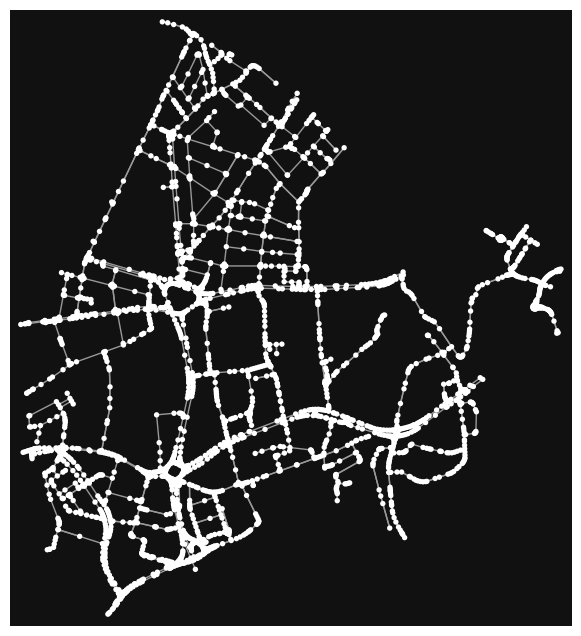

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [10]:
ox.plot_graph(G)

# Road parameters that we get from graph

In [11]:
G.get_edge_data(34806015, 1314876876)

In [12]:
for i, (_, _, a) in enumerate(G.edges(data=True)):
    if i > 5:
        break
    print(a)

{'osmid': 216893223, 'oneway': True, 'lanes': '1', 'name': 'Grzegórzecka', 'highway': 'residential', 'maxspeed': '30', 'width': '3', 'reversed': False, 'length': 5.904}
{'osmid': 26342680, 'lanes': '4', 'name': 'Świętego Łazarza', 'highway': 'residential', 'maxspeed': '50', 'oneway': False, 'reversed': False, 'length': 1.235}
{'osmid': 116688056, 'oneway': True, 'lanes': '1', 'highway': 'residential', 'maxspeed': '50', 'reversed': False, 'length': 2.892}
{'osmid': 179246547, 'oneway': True, 'lanes': '2', 'name': 'Grzegórzecka', 'highway': 'residential', 'maxspeed': '40', 'reversed': False, 'length': 5.375}
{'osmid': 179246547, 'oneway': True, 'lanes': '2', 'name': 'Grzegórzecka', 'highway': 'residential', 'maxspeed': '40', 'reversed': False, 'length': 28.189}
{'osmid': 179246547, 'oneway': True, 'lanes': '2', 'name': 'Grzegórzecka', 'highway': 'residential', 'maxspeed': '40', 'reversed': False, 'length': 136.907}


# Simplifying Graph

### Consolidating intersections

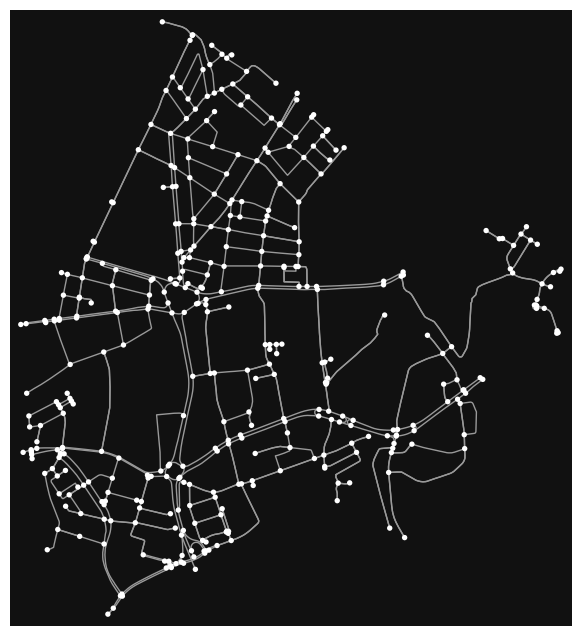

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [13]:
G_simplified = ox.simplify_graph(G)
ox.plot_graph(G_simplified)

In [15]:
for i, (_, _, a) in enumerate(G.edges(data=True)):
    if i > 5:
        break
    print(a)

{'osmid': 216893223, 'oneway': True, 'lanes': '1', 'name': 'Grzegórzecka', 'highway': 'residential', 'maxspeed': '30', 'width': '3', 'reversed': False, 'length': 5.904}
{'osmid': 26342680, 'lanes': '4', 'name': 'Świętego Łazarza', 'highway': 'residential', 'maxspeed': '50', 'oneway': False, 'reversed': False, 'length': 1.235}
{'osmid': 116688056, 'oneway': True, 'lanes': '1', 'highway': 'residential', 'maxspeed': '50', 'reversed': False, 'length': 2.892}
{'osmid': 179246547, 'oneway': True, 'lanes': '2', 'name': 'Grzegórzecka', 'highway': 'residential', 'maxspeed': '40', 'reversed': False, 'length': 5.375}
{'osmid': 179246547, 'oneway': True, 'lanes': '2', 'name': 'Grzegórzecka', 'highway': 'residential', 'maxspeed': '40', 'reversed': False, 'length': 28.189}
{'osmid': 179246547, 'oneway': True, 'lanes': '2', 'name': 'Grzegórzecka', 'highway': 'residential', 'maxspeed': '40', 'reversed': False, 'length': 136.907}


In [35]:
for u, v, a in G_simplified.edges(data=True):
    if 'name' in a and 'Mosiężnicza' in a['name']:
        print(f'[{u}][{v}] - {a}')

[316293928][903113779] - {'osmid': [195550161, 29349590], 'name': 'Mosiężnicza', 'highway': 'residential', 'maxspeed': ['30', '50'], 'oneway': False, 'reversed': False, 'length': 117.891, 'geometry': <LINESTRING (19.961 50.065, 19.962 50.065, 19.963 50.066, 19.963 50.066)>}
[903113779][316293928] - {'osmid': [195550161, 29349590], 'name': 'Mosiężnicza', 'highway': 'residential', 'maxspeed': ['30', '50'], 'oneway': False, 'reversed': True, 'length': 117.891, 'geometry': <LINESTRING (19.963 50.066, 19.963 50.066, 19.962 50.065, 19.961 50.065)>}


![length of Mosiężna in real life](img/street-length.png)

We can see that the length attribute in OSMnx graph is actually a length in meters (as some parts of the documentation says). Here we have to edges as "Mosiężnicza" street, because we have one edge for every direction

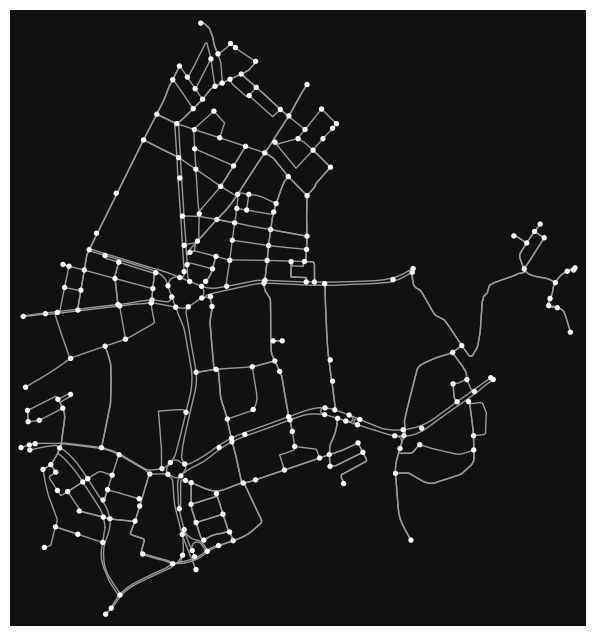

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [36]:
G2 = ox.consolidate_intersections(ox.project_graph(G_simplified), tolerance=15)
ox.plot_graph(G2)

In [37]:
for u, v, a in G.edges(data=True):
    if 'name' in a and 'Mosiężnicza' in a['name']:
        print(f'[{u}][{v}] - {a}')

[316293928][5627180556] - {'osmid': 29349590, 'name': 'Mosiężnicza', 'highway': 'residential', 'maxspeed': '30', 'oneway': False, 'reversed': False, 'length': 9.919}
[322846332][5627180556] - {'osmid': 29349590, 'name': 'Mosiężnicza', 'highway': 'residential', 'maxspeed': '30', 'oneway': False, 'reversed': True, 'length': 78.147}
[322846332][903113779] - {'osmid': 195550161, 'name': 'Mosiężnicza', 'highway': 'residential', 'maxspeed': '50', 'oneway': False, 'reversed': False, 'length': 29.825}
[903113779][322846332] - {'osmid': 195550161, 'name': 'Mosiężnicza', 'highway': 'residential', 'maxspeed': '50', 'oneway': False, 'reversed': True, 'length': 29.825}
[5627180556][322846332] - {'osmid': 29349590, 'name': 'Mosiężnicza', 'highway': 'residential', 'maxspeed': '30', 'oneway': False, 'reversed': False, 'length': 78.147}
[5627180556][316293928] - {'osmid': 29349590, 'name': 'Mosiężnicza', 'highway': 'residential', 'maxspeed': '30', 'oneway': False, 'reversed': True, 'length': 9.919}


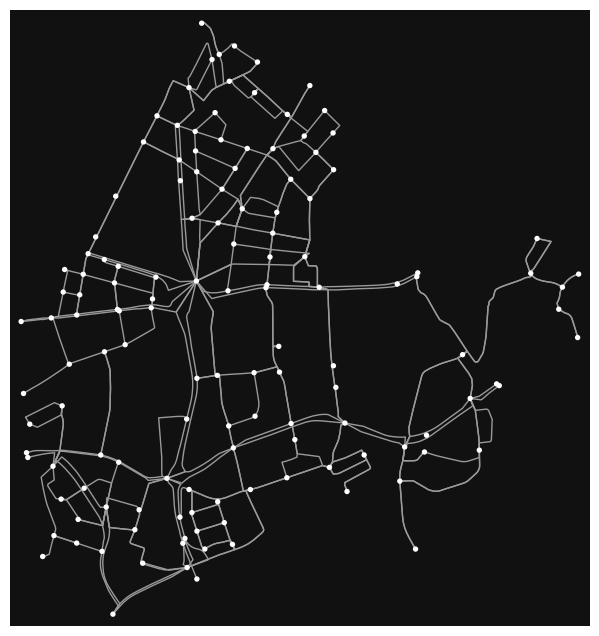

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [38]:
G3 = ox.consolidate_intersections(ox.project_graph(G_simplified), tolerance=40)
ox.plot_graph(G3)

# Engineering graph features

In [39]:
for u, v, a in G2.edges(data=True):
    if 'maxspeed' not in a:
        a['maxspeed'] = 50
    if isinstance(a['maxspeed'], list):
        a['maxspeed'] = min(a['maxspeed'])
    elif isinstance(a['maxspeed'], dict):
        print(a)

    if isinstance(a['maxspeed'], str):
        a['maxspeed'] = float(a['maxspeed'])

    a['travel_time'] = a['length'] / a['maxspeed']

    G2[u][v][0]['travel_time'] = a['travel_time']

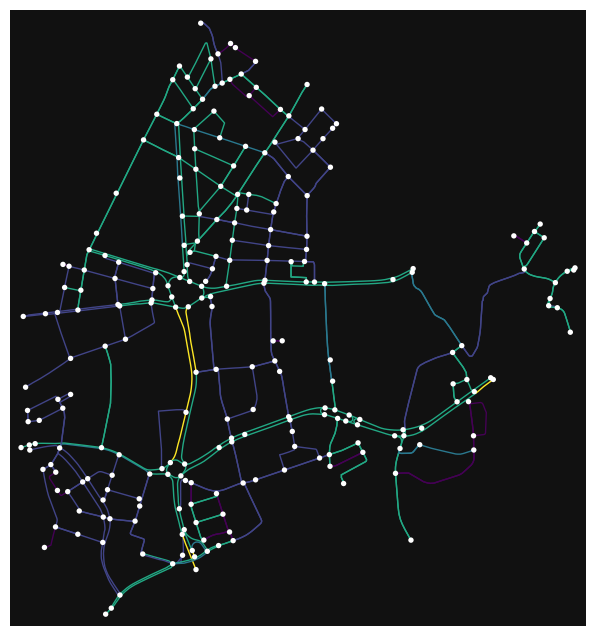

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [40]:
ox.plot_graph(G2, edge_color=ox.plot.get_edge_colors_by_attr(G2, attr='maxspeed'))

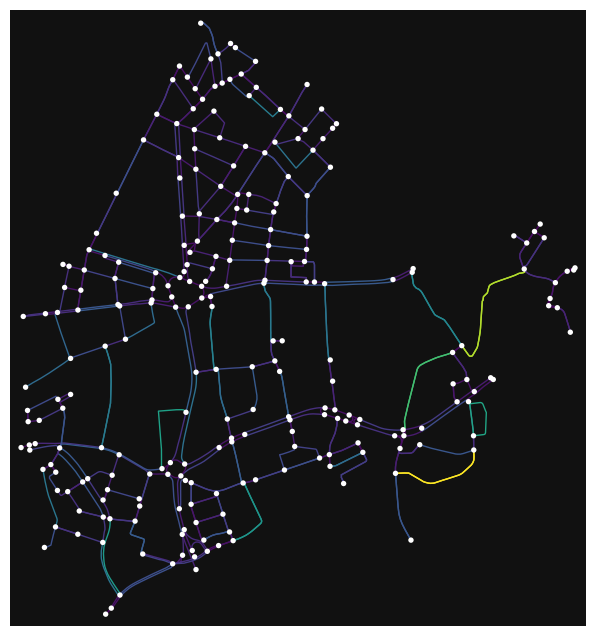

In [41]:
fig, ax = ox.plot_graph(G2, edge_color=ox.plot.get_edge_colors_by_attr(G2, attr='travel_time'))

In [42]:
edges_by_time = sorted(G2.edges(data=True), key=lambda e: e[2]['travel_time'], reverse=True)

In [43]:
[e[2]['name'] for e in edges_by_time[:10]]

[['Bajeczna', 'Widok'],
 ['Bajeczna', 'Widok'],
 ['Kosynierów', 'Dąbska'],
 ['Kosynierów', 'Dąbska'],
 'Zwycięstwa',
 'Zwycięstwa',
 'Widok',
 'Półkole',
 'Hetmana Stanisława Żółkiewskiego',
 'Aleja Ignacego Daszyńskiego']

In [44]:
nodes_centrality = nx.betweenness_centrality(G2, weight='length')

In [45]:
for node, centrality in nodes_centrality.items():
    G2.nodes[node]['centrality'] = centrality

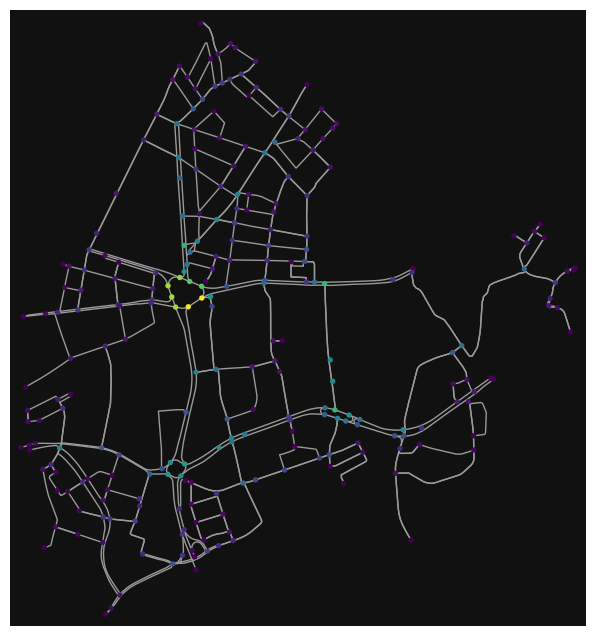

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [46]:
ox.plot_graph(G2, node_color=ox.plot.get_node_colors_by_attr(G2, attr='centrality'))

In [47]:
edges_centrality = nx.edge_betweenness_centrality(G2, weight='length')

In [48]:
for (u, v, i), centrality in edges_centrality.items():
    G2[u][v][i]['centrality'] = centrality

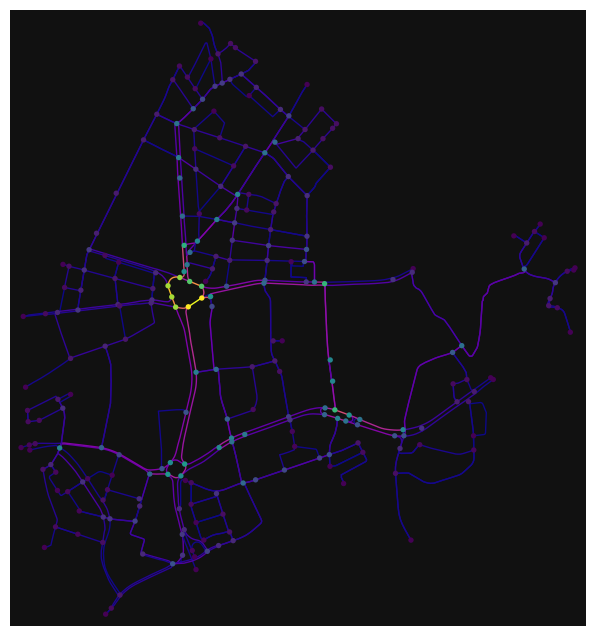

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [49]:
ox.plot_graph(G2, node_color=ox.plot.get_node_colors_by_attr(G2, attr='centrality'), edge_color=ox.plot.get_edge_colors_by_attr(G2, attr='centrality', cmap='plasma'))

# Trying to change the MultiDiGraph to DiGraph

We shouldn't have multiple edges between the same nodes

In [50]:
G_basic = nx.DiGraph(G2)

TypeError: OutEdgeView.__call__() got an unexpected keyword argument 'keys'

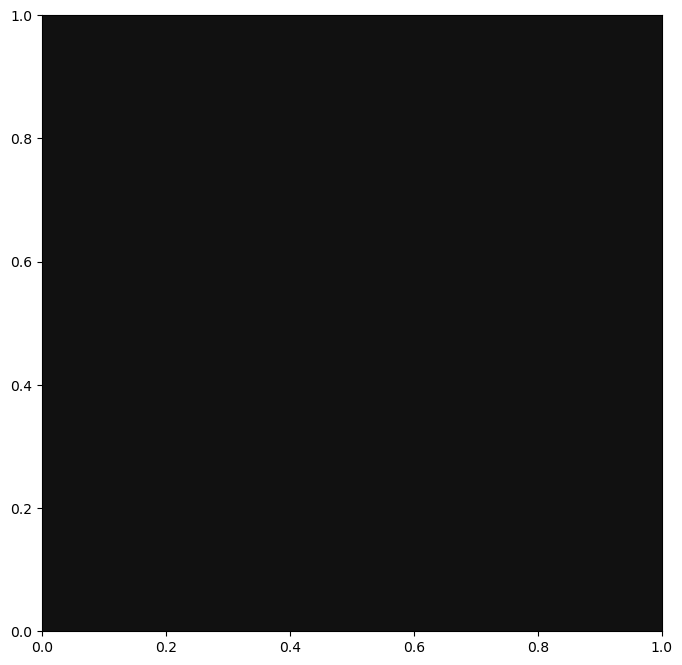

In [51]:
ox.plot_graph(G_basic, node_color=ox.plot.get_node_colors_by_attr(G_basic, attr='centrality'), edge_color=ox.plot.get_edge_colors_by_attr(G_basic, attr='centrality', cmap='plasma'))

OSMnx doesn't work with DiGraphs (it assumes the input graph is always multigraph)

# Doing the same on whole city graph

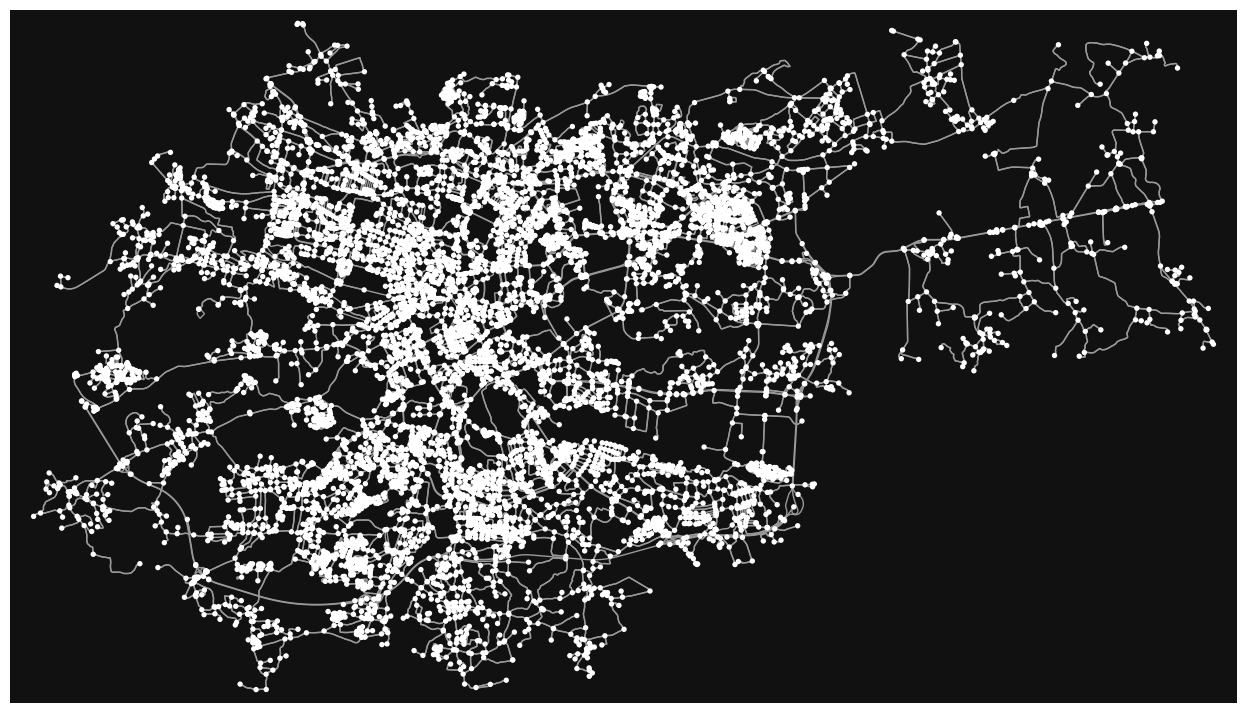

In [54]:
G = ox.graph_from_place("Kraków", network_type="drive")
fig, ax = ox.plot_graph(G, figsize=(16, 9))

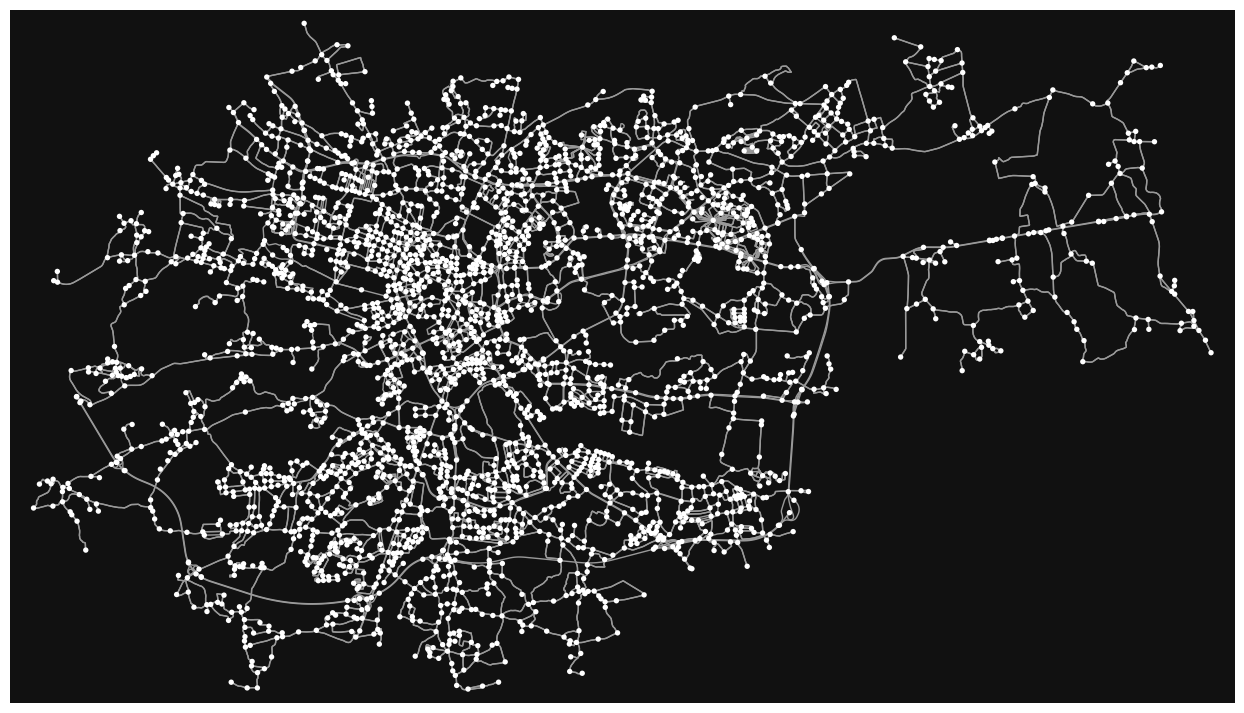

(<Figure size 1600x900 with 1 Axes>, <AxesSubplot: >)

In [57]:
G_consolidated = ox.consolidate_intersections(ox.project_graph(G), tolerance=40)
ox.plot_graph(G_consolidated, figsize=(16, 9))

In [58]:
nodes_centrality = nx.betweenness_centrality(G_consolidated, weight='length')
edges_centrality = nx.edge_betweenness_centrality(G_consolidated, weight='length')

for (u, v, i), centrality in edges_centrality.items():
    G_consolidated[u][v][i]['centrality'] = centrality

for node, centrality in nodes_centrality.items():
    G_consolidated.nodes[node]['centrality'] = centrality

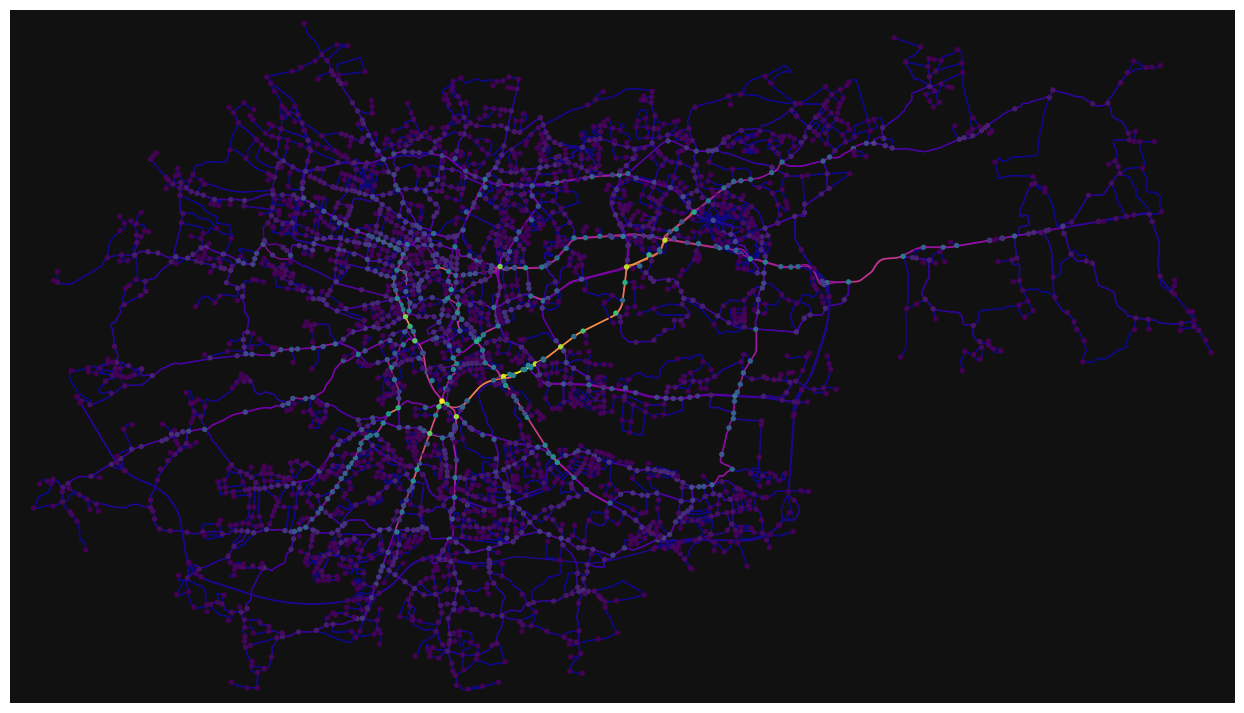

(<Figure size 1600x900 with 1 Axes>, <AxesSubplot: >)

In [60]:
ox.plot_graph(G_consolidated, node_color=ox.plot.get_node_colors_by_attr(G_consolidated, attr='centrality'),
              edge_color=ox.plot.get_edge_colors_by_attr(G_consolidated, attr='centrality', cmap='plasma'),
              figsize=(16, 9))